In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#we have 201 NULL values in bmi column , since we have 5110 instance and bmi is numerical column we will fill NULLs with mean 
df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [6]:
#we will drop id column since it is not importnat

df = df.drop("id",axis=1)
df['ever_married'] = df['ever_married'].map( 
                   {'Yes':1 ,'No':0})
df['ever_married'].value_counts()

ever_married
1    3353
0    1757
Name: count, dtype: int64

In [7]:
df.isna().sum()                                              #  3.9% of rows are having NULLs so we can drop them

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [9]:
df = df[df['gender'] != 'Other']

# Now df will only contain rows where the gender is either 'Male' or 'Female'
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [10]:
df['stroke'].value_counts()               #95,7% of target data is 0 "not stroke"!!! , that is a huge difference we need to balance it

stroke
0    4860
1     249
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 479.0+ KB


In [12]:
numerical_df = df[['age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','stroke']]

In [13]:
numerical_df.shape

(5109, 7)

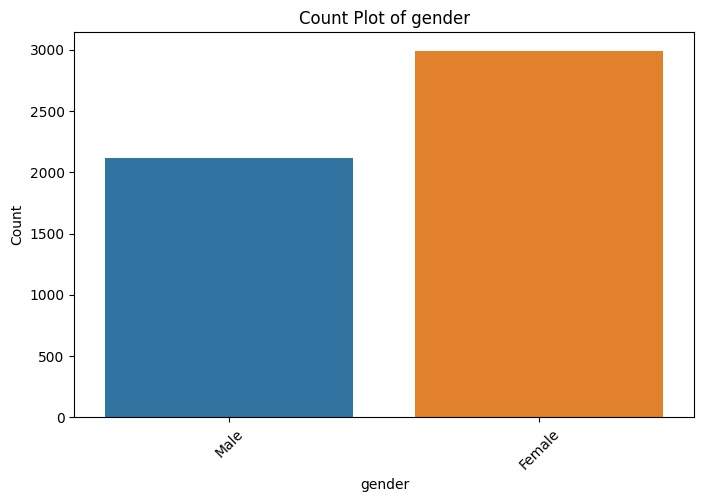

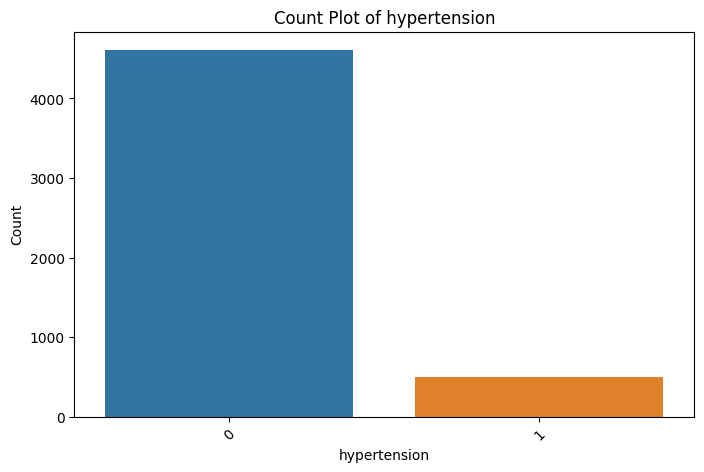

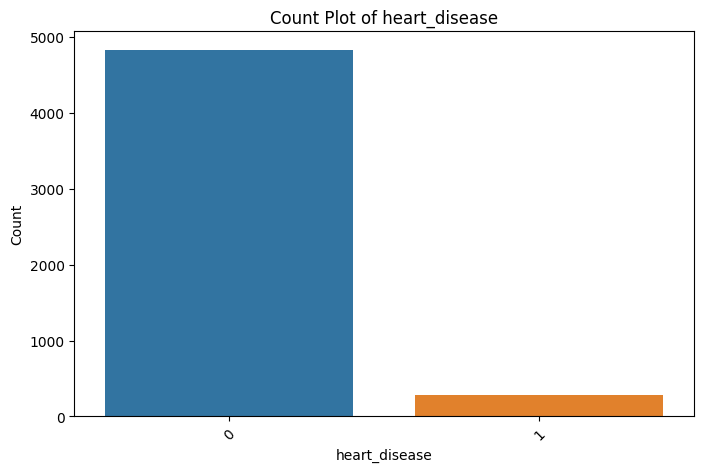

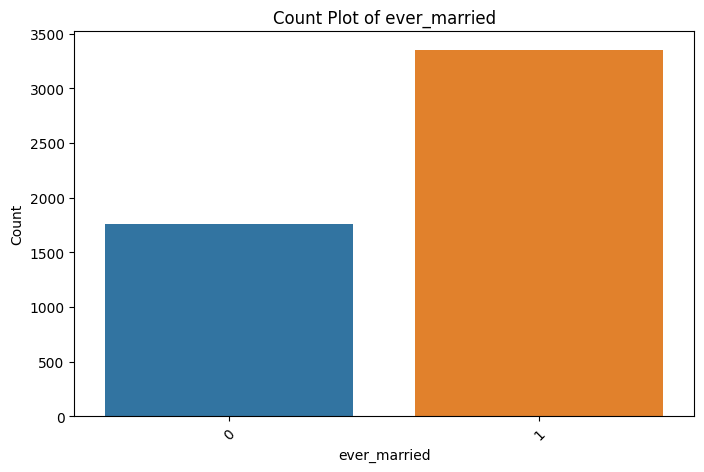

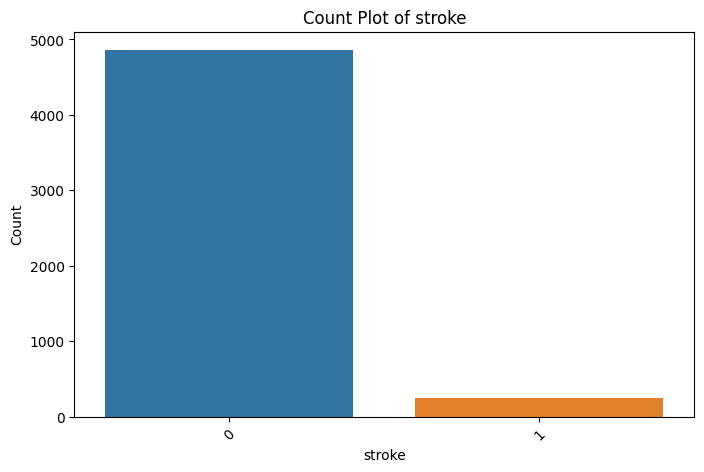

In [14]:
ColumnsForCountPlot = ['gender','hypertension','heart_disease','ever_married','stroke']
for column in ColumnsForCountPlot:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column])
    plt.title(f'Count Plot of {column}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

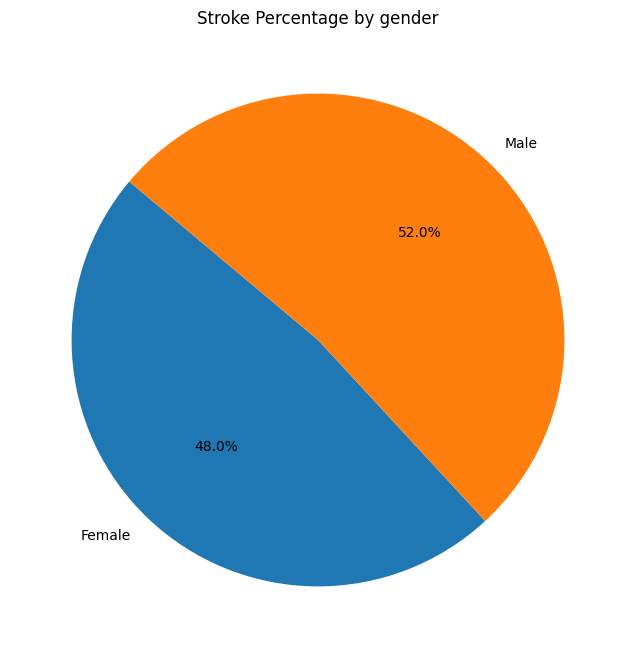

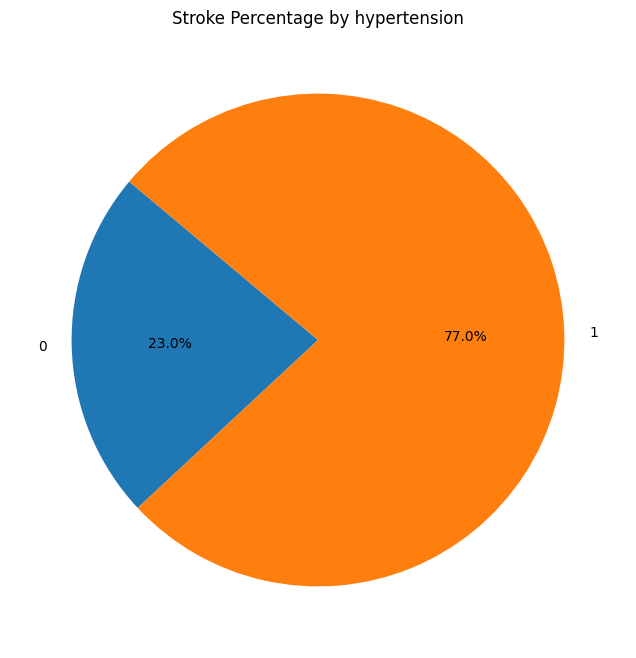

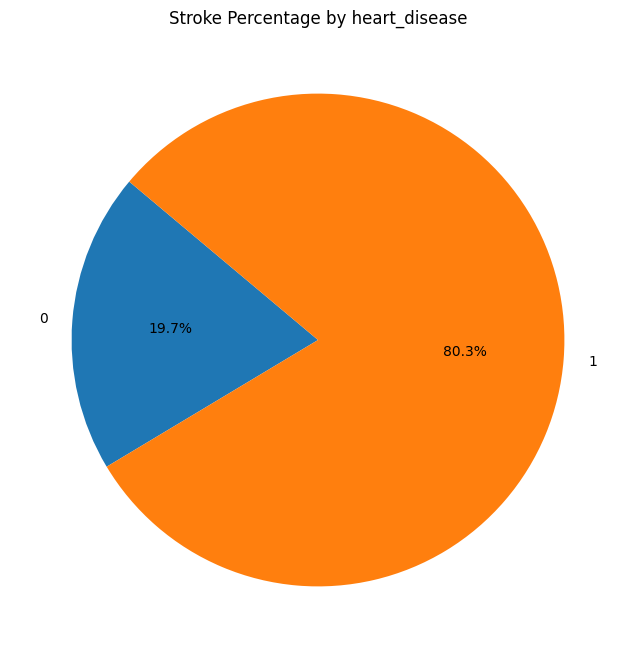

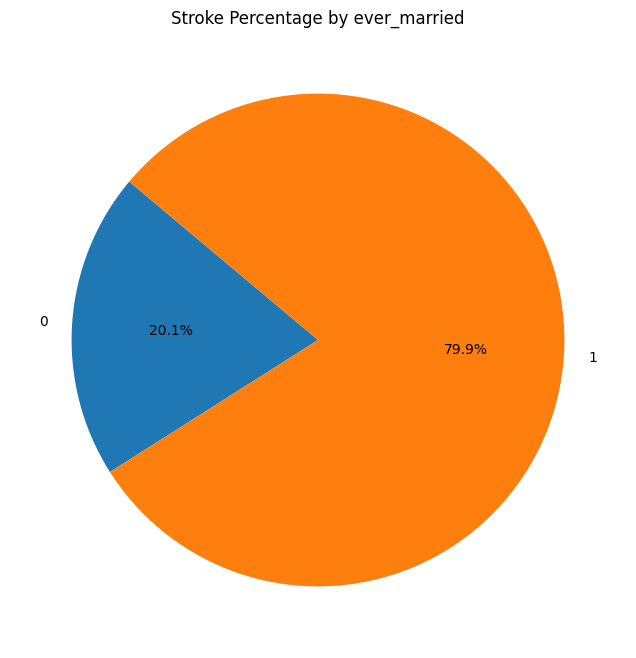

In [15]:
ColumnsForCountPlot = ['gender','hypertension','heart_disease','ever_married']
for column in ColumnsForCountPlot:
    # Calculate the percentage of stroke occurrences for each category in the column
    stroke_percentages = df.groupby(column)['stroke'].mean() * 100

    plt.figure(figsize=(8, 8))
    plt.pie(stroke_percentages, labels=stroke_percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Stroke Percentage by {column}')
    plt.show()

In [16]:
corr = numerical_df.corr()

<Axes: >

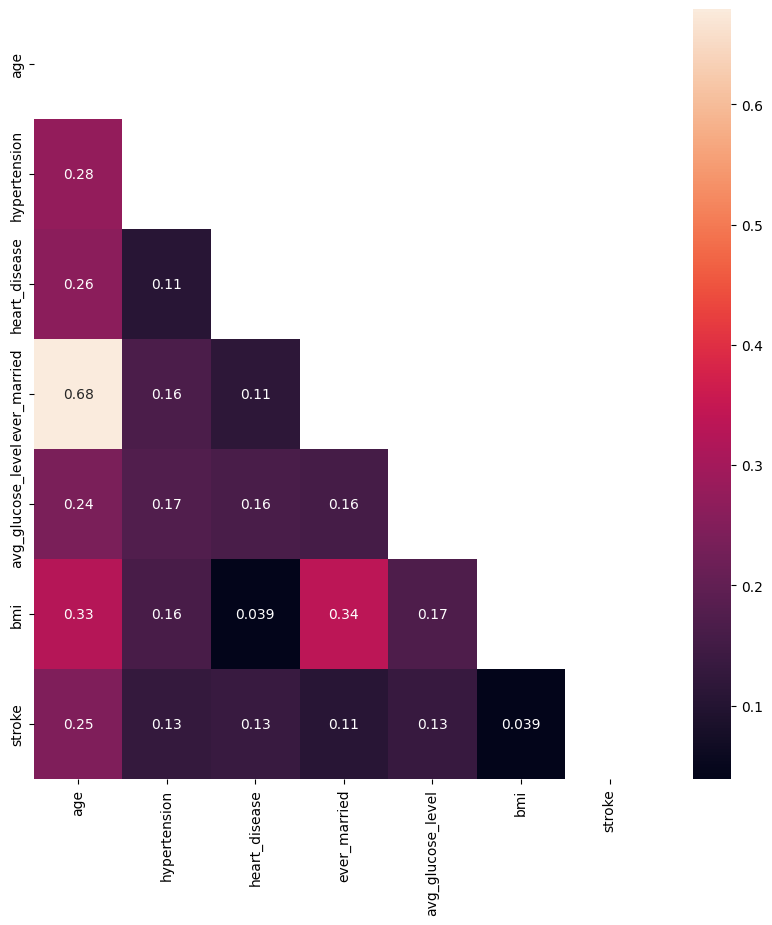

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,mask = np.triu(np.ones_like(corr, dtype=bool)))

In [18]:
df = pd.get_dummies(df).astype(int)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,1,228,36,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61,0,0,1,202,28,1,1,0,0,0,0,1,0,1,0,0,0,1,0
2,80,0,1,1,105,32,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49,0,0,1,171,34,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79,1,0,1,174,24,1,1,0,0,0,0,1,0,1,0,0,0,1,0


In [19]:
df.shape

(5109, 20)

<Axes: >

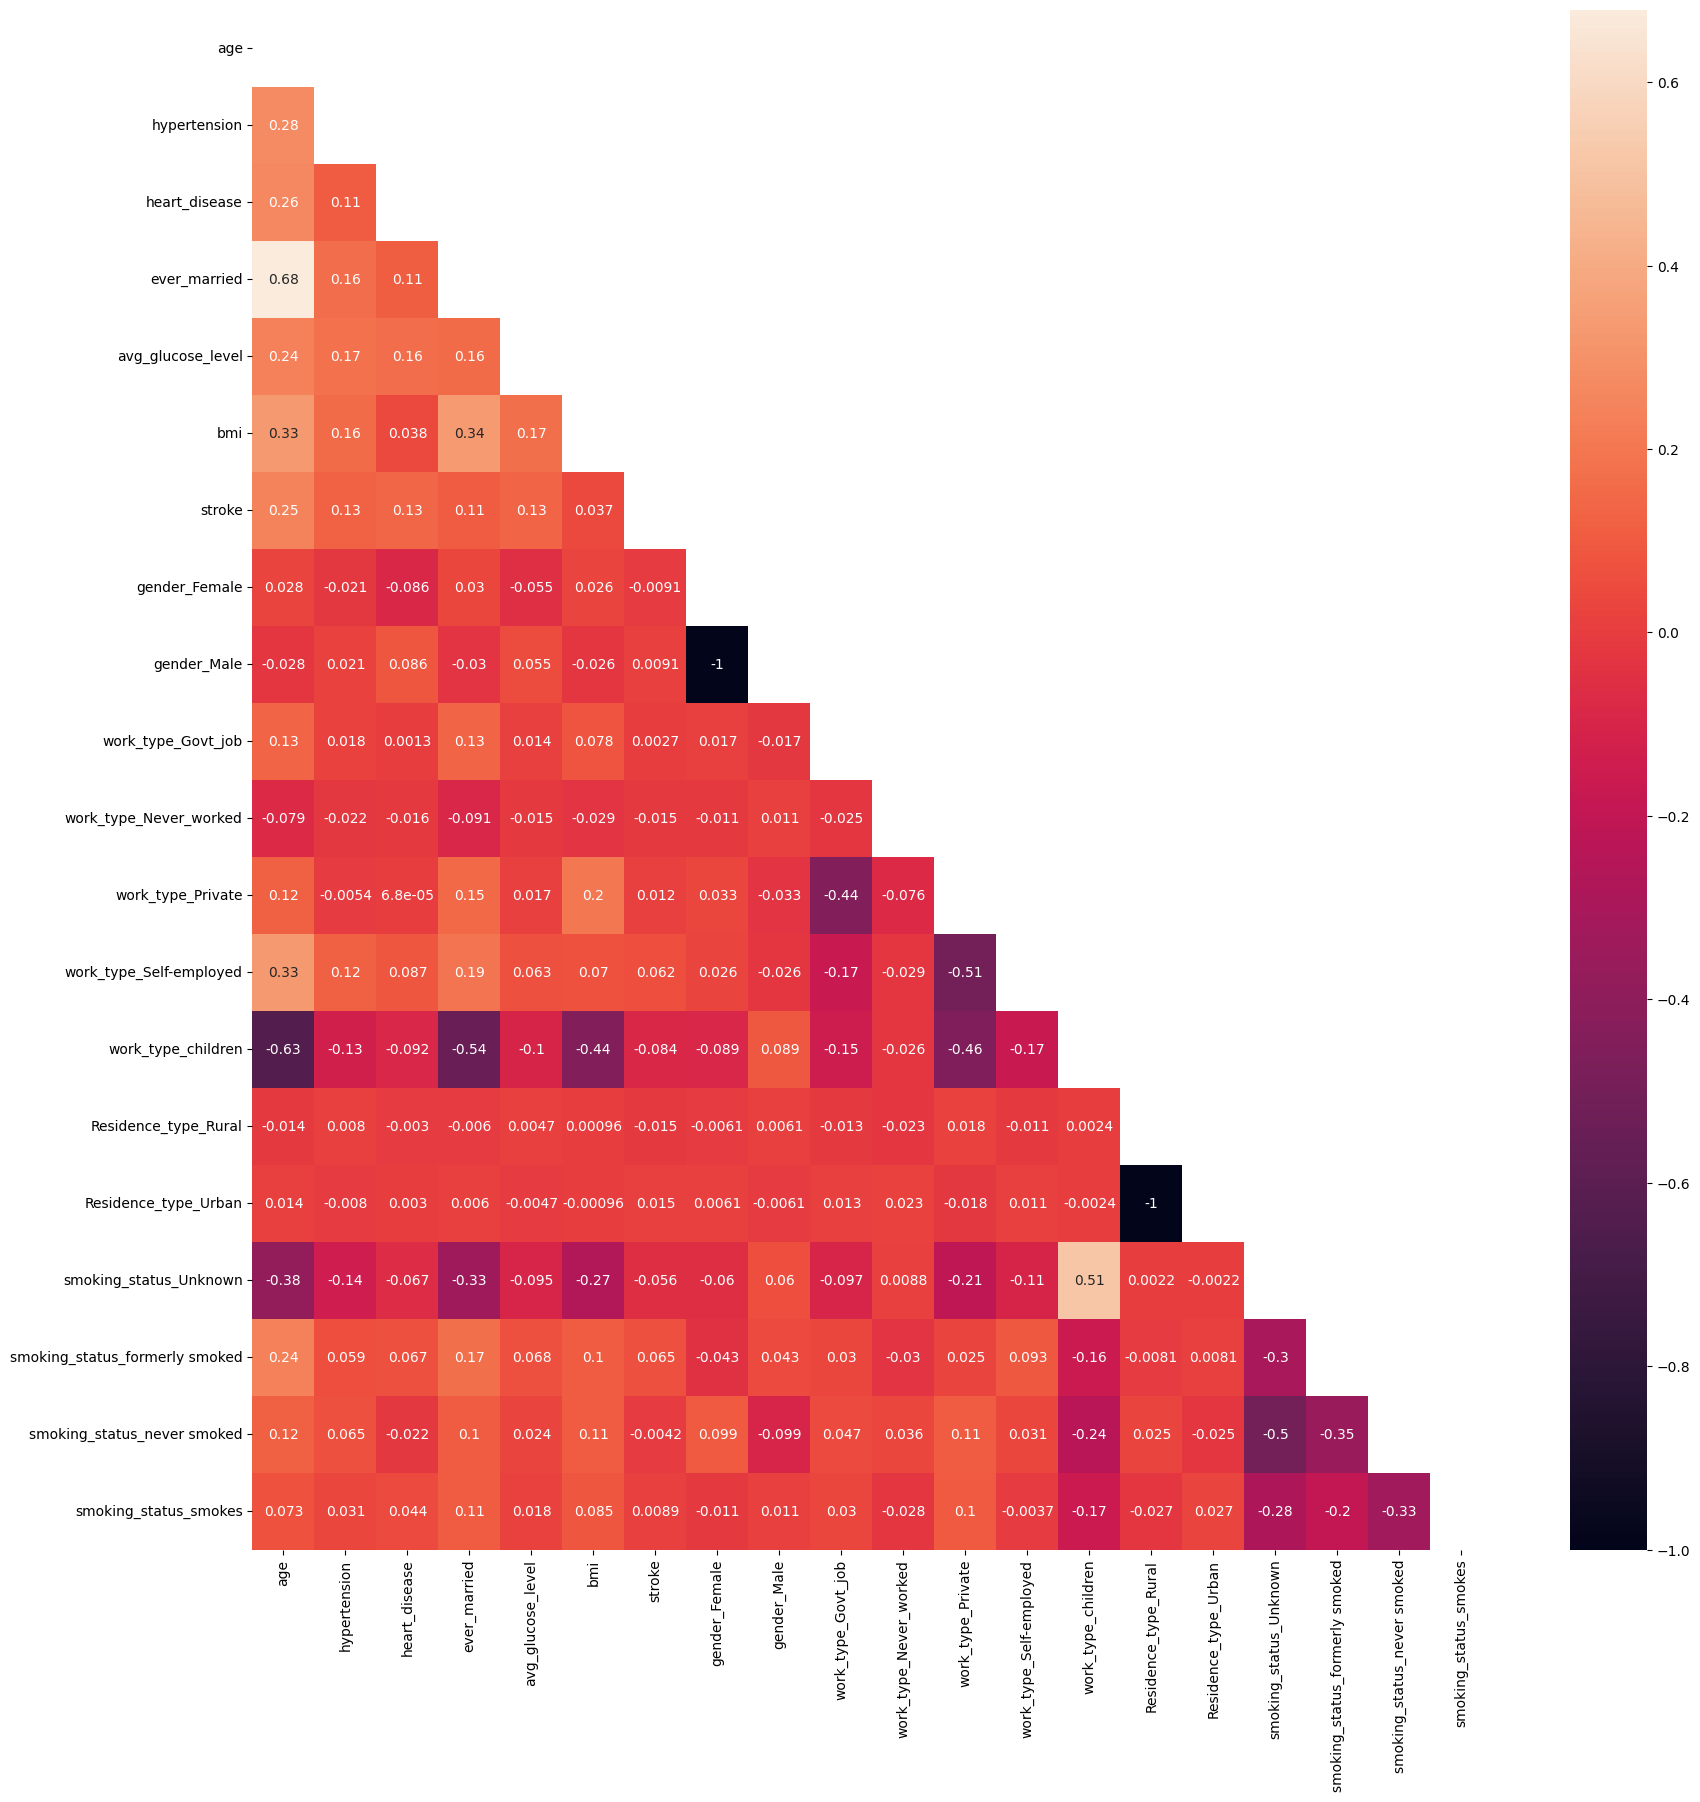

In [20]:

corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,mask = np.triu(np.ones_like(corr, dtype=bool)))

In [21]:
df.stroke.value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

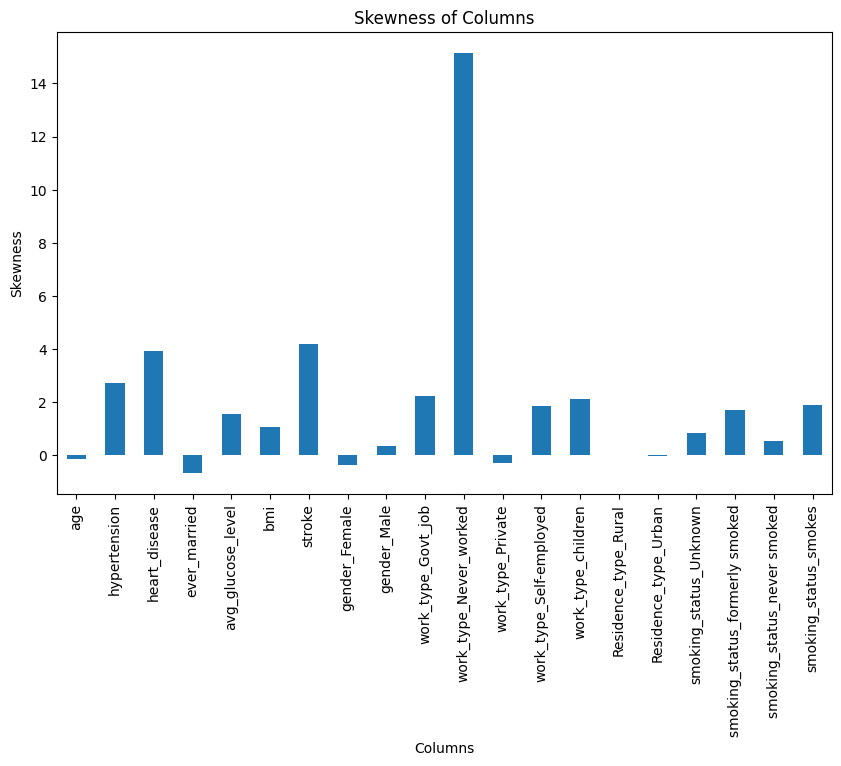

In [22]:
# Calculate the skewness for each column
skewness = df.skew()

# Plot the skewness for each column
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()

In [23]:
x = df.drop("stroke",axis=1)
y = df.stroke

In [24]:
x.shape , y.shape , y.value_counts()

((5109, 19),
 (5109,),
 stroke
 0    4860
 1     249
 Name: count, dtype: int64)

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(sampling_strategy="minority")

In [27]:
x_smote , y_smote = smote.fit_resample(x,y)                #it was fit_sample  but now it is fit_resample

In [28]:
y_smote.value_counts()

stroke
1    4860
0    4860
Name: count, dtype: int64

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42,stratify=y_smote)

In [30]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [31]:
y_train.value_counts() ,y_test.value_counts()

(stroke
 1    3888
 0    3888
 Name: count, dtype: int64,
 stroke
 0    972
 1    972
 Name: count, dtype: int64)

In [32]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [33]:

import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)


100%|██████████| 29/29 [00:25<00:00,  1.14it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.98               0.98     0.98      0.98   
LGBMClassifier                     0.97               0.97     0.97      0.97   
ExtraTreesClassifier               0.97               0.97     0.97      0.97   
BaggingClassifier                  0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
LabelSpreading                     0.96               0.96     0.96      0.96   
SVC                                0.96               0.96     0.96      0.96   
LabelPropagation                   0.96               0.96     0.96      0.96   
LinearSVC                          0.96               0.96     0.96      0.96   
CalibratedClassifierCV      

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9789094650205762


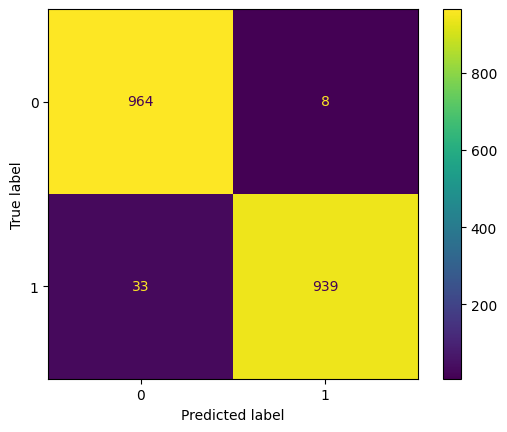

In [36]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();